In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [4]:
iris = load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [13]:
data = data[['sepal length (cm)', 'sepal width (cm)']]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [16]:
data_class = iris.target

In [17]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.3)

In [21]:
lda = LinearDiscriminantAnalysis()

In [22]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [23]:
lda.predict(X_test)

array([2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2,
       1])

In [25]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,2
1,2,2
2,0,0
3,1,2
4,0,0
5,1,1
6,0,0
7,0,0
8,1,1
9,1,1


In [27]:
accuracy_score(y_test, lda.predict(X_test))

0.8666666666666667

<function matplotlib.pyplot.legend(*args, **kwargs)>

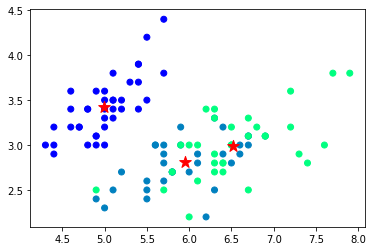

In [52]:
#классификация в тренировочной выборке
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], cmap = 'winter', c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.legend

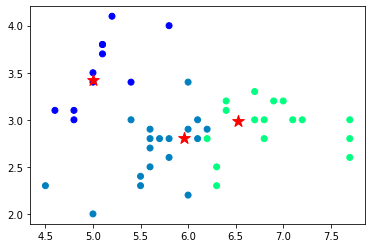

In [53]:
#классификация в тестовой выборке на основе LDA
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], cmap = 'winter', c=lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

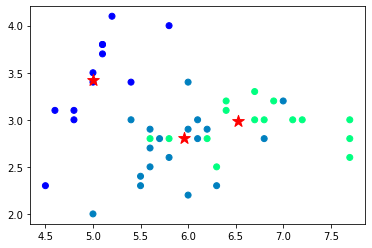

In [54]:
#классификация в тестовой выборке согласно исходным данным
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], cmap = 'winter', c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

In [55]:
from sklearn.cluster import KMeans

In [56]:
k_inertia = []
ks = range(1, 10)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data)
    k_inertia.append(clf_kmeans.inertia_)

C:\Users\stolb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


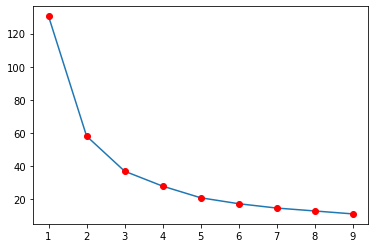

In [57]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Видим, что после трех кластерах кривая выполаживается, это оптимальное количество кластеров. 

In [64]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

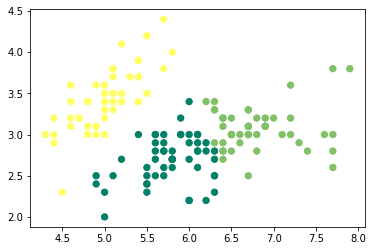

In [65]:
#кластеризация
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='summer', c=clusters, s=40)